In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('train.csv')

In [3]:
a=data.iloc[0,1:].values

In [4]:
a=a.reshape(28,28).astype('uint8')

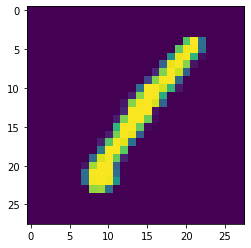

In [5]:
plt.imshow(a)

In [6]:
data.shape

(42000, 785)

In [7]:
data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [8]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
rf=RandomForestClassifier(n_estimators=100)

In [10]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
rf.score(x_test,y_test)

0.9635714285714285

In [12]:
test=pd.read_csv('test.csv')

In [13]:
res=rf.predict(test)

In [14]:
res

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [15]:
camera=cv2.VideoCapture(0)

In [16]:
def showImage(photo):
    cv2.imshow('Hand digit',photo)
    cv2.waitKey(10000)
    cv2.destroyAllWindows()
    camera.release()

In [17]:
ret, photo=camera.read()
if ret==True:
    showImage(photo)

In [18]:
gray=cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
photo=cv2.resize(gray,(28,28))
photo.shape

(28, 28)

In [19]:
photo=photo.reshape((1,28*28))

In [20]:
rf.predict(photo)

array([8], dtype=int64)